In [21]:
# 导入所需模块
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import copy
# plt显示彩色图片
def plt_show0(img):
#cv2与plt的图像通道不同：cv2为[b,g,r];plt为[r, g, b]
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

# 图像去噪灰度处理
def gray_guss(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image


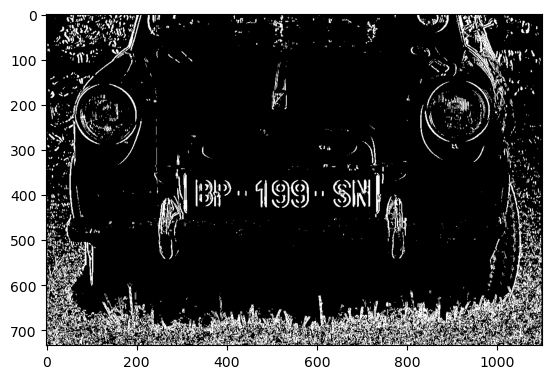

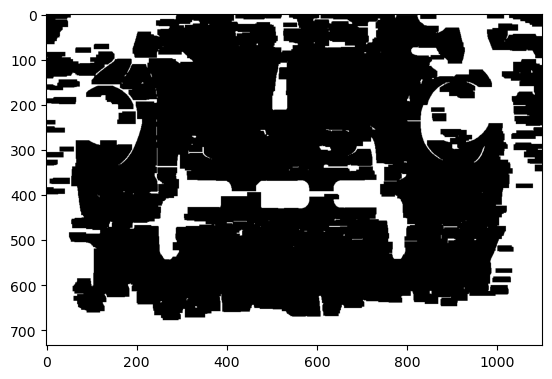

In [23]:
# 读取待检测图片
origin_image = cv2.imread('car.png')
# 复制一张图片，在复制图上进行图像操作，保留原图
image = origin_image.copy()
# 图像去噪灰度处理
gray_image = gray_guss(image)
# x方向上的边缘检测（增强边缘信息）
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
absX = cv2.convertScaleAbs(Sobel_x)
image = absX

# 图像阈值化操作——获得二值化图
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
# 显示灰度图像
plt_show(image)
# 形态学（从图像中提取对表达和描绘区域形状有意义的图像分量）——闭操作
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 1)
# 显示灰度图像
plt_show(image)


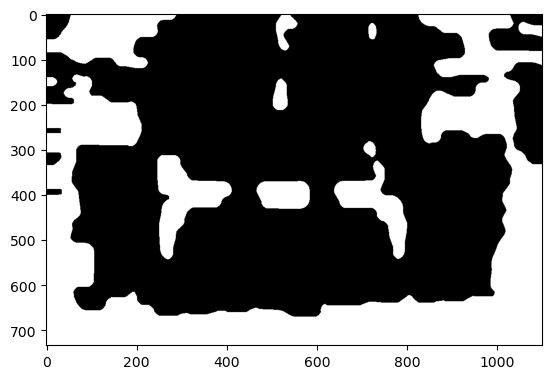

In [24]:
# 腐蚀（erode）和膨胀（dilate）
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))
#x方向进行闭操作（抑制暗细节）
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
#y方向的开操作
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)
# 中值滤波（去噪）
image = cv2.medianBlur(image, 21)
# 显示灰度图像
plt_show(image)
# 获得轮廓
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    # 根据轮廓的形状特点，确定车牌的轮廓位置并截取图像
    if (weight > (height * 3.5)) and (weight < (height * 4)):
        image = origin_image[y:y + height, x:x + weight]
        plt_show0(image)


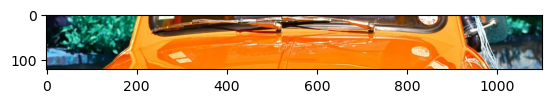

In [20]:
crop_img = origin_image[y:y+height][x:x+weight]
plt_show(crop_img)

In [16]:
#车牌字符分割
# 图像去噪灰度处理
gray_image = gray_guss(image)
# 图像阈值化操作——获得二值化图   
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

#膨胀操作，使“苏”字膨胀为一个近似的整体，为分割做准备
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
image = cv2.dilate(image, kernel)
plt_show(image)


error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
